# Task 4

###### I am going to provide two .csv files , you are supposed to work on them and have to provide solutions to the following problems

###### import necessary libraries

In [200]:
import pandas as pd
import matplotlib.pyplot as plt

###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [201]:
df1 = pd.read_csv(r'C:\Users\milan\Desktop\Task4\college_1.csv')

In [202]:
df2 = pd.read_csv(r'C:\Users\milan\Desktop\Task4\college_2.csv')

In [203]:
df1.shape

(84, 7)

In [204]:
df2.shape

(35, 9)

In [205]:
df = pd.concat([df1,df2])

In [206]:
df.shape

(119, 9)

In [207]:
df.head(10)

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN
3,Mugunthan S,100.0,47.0,10610,10610,Computer Science and Engineering,0,NaN,NaN
4,Sathammai.S,100.0,8.0,8980,8980,Computer Science and Engineering,0,NaN,NaN
5,NIVEESHWAR S,100.0,0.0,8200,8200,Computer Science and Engineering,0,NaN,NaN
6,KALAIARASAN K,85.0,47.0,7750,7880,Electronics and Communication Engineering,130,NaN,NaN
7,MOHAMED ZUBAIR AHMED,82.0,4.0,7020,7020,Computer Science and Engineering,0,NaN,NaN
8,J.SUGANTHI,27.0,50.0,5860,5860,Electronics and Communication Engineering,0,NaN,NaN
9,thamizhpaana,29.0,0.0,5500,5500,Computer Science and Engineering,0,NaN,NaN


## Cleaning data

In [208]:
def NameClean(name):
    le = len(name)
    if name[1] == '.':
        tmp_name = name.split('.')
        fin = tmp_name[1].strip()
        return fin
    elif name[le-3] == '.':
        tmp_name = name.split('.')
        fin = tmp_name[0].strip()
        return fin
    elif name[le -2] == '.':
        tmp_name = name.split('.')
        fin = tmp_name[0].strip()
        return fin
    else:
        tmp_name = name.split()
        le = len(tmp_name)
        if le > 1:
            tmp = [i for i in tmp_name if len(i) != 1]
            fin = ' '.join(tmp)
            return fin
        else:
            return name

In [209]:
df['Department'].unique()

array(['Computer Science and Engineering',
       'Electronics and Communication Engineering',
       'Electronics and Electrical Engineering'], dtype=object)

In [210]:
df.Name = df.Name.apply(lambda x : NameClean(x))
df['Name'] = df['Name'].apply(lambda x : x.capitalize())
df['Department'] = df['Department'].apply(lambda x : 'ECE' if x == 'Electronics and Communication Engineering' else ('CSE' if x == 'Computer Science and Engineering' else 'EEE'))
df.fillna(0, inplace = True)

In [211]:
df.head(10)

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,Dharani,82.0,20.0,24500,24500,CSE,0,0.0,0.0
1,Jeevitha,82.0,20.0,21740,21740,CSE,0,0.0,0.0
2,Hemavathi,100.0,100.0,19680,19680,CSE,0,0.0,0.0
3,Mugunthan,100.0,47.0,10610,10610,CSE,0,0.0,0.0
4,Sathammai,100.0,8.0,8980,8980,CSE,0,0.0,0.0
5,Niveeshwar,100.0,0.0,8200,8200,CSE,0,0.0,0.0
6,Kalaiarasan,85.0,47.0,7750,7880,ECE,130,0.0,0.0
7,Mohamed zubair ahmed,82.0,4.0,7020,7020,CSE,0,0.0,0.0
8,Suganthi,27.0,50.0,5860,5860,ECE,0,0.0,0.0
9,Thamizhpaana,29.0,0.0,5500,5500,CSE,0,0.0,0.0


###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


In [212]:
df1 = df[df['CodeKata Score'] > 15000]
df1.to_csv(r'C:\Users\milan\Desktop\Task4\Exceeded_expectations.csv',index = False)

###### if  10000<codekata score<15000   (Reached_expectations.csv)



In [213]:
df1 = df[(df['CodeKata Score'] > 10000) & (df['CodeKata Score'] < 15000)]
df1.to_csv(r'C:\Users\milan\Desktop\Task4\Reached_expectations.csv',index = False)

###### if  7000<codekata score<10000   (Needs_Improvement.csv)


In [214]:
df1 = df[df['CodeKata Score'] < 10000]
df1.to_csv(r'C:\Users\milan\Desktop\Task4\Needs_Improvement.csv',index = False)

###### if  codekate score < 7000        (Unsatisfactory.csv)

In [215]:
df1 = df[df['CodeKata Score'] < 7000]
df1.to_csv(r'C:\Users\milan\Desktop\Task4\Unsatisfactory.csv',index = False)

###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [216]:
df['Difference_from_last_week'] = df['CodeKata Score'] - df['Previous Geekions']
df.tail(10)

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking,Difference_from_last_week
25,Shaik danish,-1.0,0.0,4050,4820,CSE,770,43.0,0.0,770
26,Sridhar,-1.0,0.0,3860,4440,CSE,580,52.0,0.0,580
27,Vimalesh fernando,-1.0,0.0,4170,4170,CSE,0,0.0,0.0,0
28,Karthikeyan,-1.0,4.0,4020,4020,CSE,0,0.0,6.0,0
29,Abishak,-1.0,35.0,3220,3220,ECE,0,55.0,6.0,0
30,Praveen raj,24.0,0.0,2380,2380,CSE,0,-1.0,0.0,0
31,Amarnath,-1.0,12.0,1890,1890,ECE,0,52.0,-1.0,0
32,Bala,32.0,0.0,1720,1720,ECE,0,49.0,-1.0,0
33,Xy,-1.0,-1.0,0,0,CSE,0,20.0,-1.0,0
34,Hariharan,-1.0,-1.0,0,0,CSE,0,-1.0,0.0,0


###### No of students participated 

In [217]:
df[df['CodeKata Score'] > 0]
#  112 Students have been participated

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking,Difference_from_last_week
0,Dharani,82.0,20.0,24500,24500,CSE,0,0.0,0.0,0
1,Jeevitha,82.0,20.0,21740,21740,CSE,0,0.0,0.0,0
2,Hemavathi,100.0,100.0,19680,19680,CSE,0,0.0,0.0,0
3,Mugunthan,100.0,47.0,10610,10610,CSE,0,0.0,0.0,0
4,Sathammai,100.0,8.0,8980,8980,CSE,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
28,Karthikeyan,-1.0,4.0,4020,4020,CSE,0,0.0,6.0,0
29,Abishak,-1.0,35.0,3220,3220,ECE,0,55.0,6.0,0
30,Praveen raj,24.0,0.0,2380,2380,CSE,0,-1.0,0.0,0
31,Amarnath,-1.0,12.0,1890,1890,ECE,0,52.0,-1.0,0


###### #Average completion of python course or my_sql or python english or computational thinking

In [218]:
df['python_en'].mean()

8.722689075630251

In [219]:
df['computational_thinking'].mean()

0.6470588235294118

In [220]:
df['mysql'].mean()

23.5

###### rising star of the week (top 3 candidate who performed well in that particular week)

In [221]:
df.sort_values('Rising', ascending=False).head(3)

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking,Difference_from_last_week
8,Shifak,58.0,0.0,5180,8320,EEE,3140,0.0,0.0,3140
18,Narasimhan,-1.0,0.0,4800,6800,CSE,2000,-1.0,0.0,2000
2,Ganesh ramkumar,-1.0,24.0,8790,10790,CSE,2000,55.0,6.0,2000


###### Shining stars of the week (top 3 candidates who has highest geekions)

In [222]:
df.sort_values('CodeKata Score', ascending=False).head(3)

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking,Difference_from_last_week
0,Dharani,82.0,20.0,24500,24500,CSE,0,0.0,0.0,0
1,Jeevitha,82.0,20.0,21740,21740,CSE,0,0.0,0.0,0
2,Hemavathi,100.0,100.0,19680,19680,CSE,0,0.0,0.0,0


###### Department wise codekata performence (pie chart)

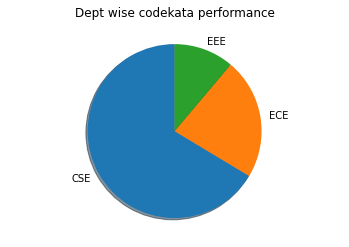

In [223]:
sums = df['CodeKata Score'].groupby(df.Department).sum()
plt.axis('equal');
plt.title('Dept wise codekata performance')
plt.pie(sums, labels = sums.index,shadow = True,startangle = 90);
plt.show()

###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

In [224]:
df1 = df.groupby(by = 'Department').max('CodeKata Score')
df1

,python,mysql,Previous Geekions,CodeKata Score,Rising,python_en,computational_thinking,Difference_from_last_week
Department,,,,,,,,
CSE,100.0,100.0,24500,24500,2000,78.0,9.0,2000
ECE,100.0,100.0,10040,10040,560,72.0,39.0,560
EEE,100.0,100.0,19400,19400,3140,100.0,9.0,3140


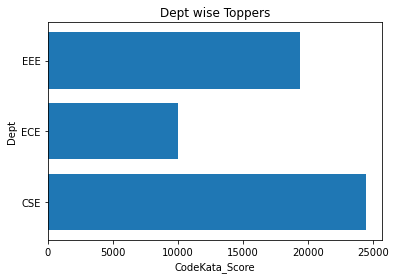

In [225]:
plt.barh(df1.index, df1['CodeKata Score'])
plt.xlabel('CodeKata_Score')
plt.ylabel('Dept')
plt.title('Dept wise Toppers')
plt.show()